<a href="https://colab.research.google.com/github/KumarSuraj15/Python/blob/main/ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical 1

In [ ]:
import pandas as pd
import numpy as np  # Change this line to import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder #Import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer #Import SimpleImputer
from sklearn.model_selection import train_test_split


df = pd.read_csv("/content/drive/MyDrive/autism_data.csv")
df.head()

# Convert 'yes'/'no' columns to 1/0
categorical_cols = df.select_dtypes(include=['object']).columns #Find categorical features
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) # Apply Label Encoding to categorical features
df.head()

# Define feature matrix x and target vector y
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # or strategy="median", 'most_frequent'
X = imputer.fit_transform(X) # Fit and transform on the entire feature matrix

# Impute missing values using the mean strategy
# imputer = SimplerImputer(strategy='mean') # Create an imputer object
# x = imputer.fit_transform(x) # Fit and transform the imputer on your feature matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Changed 'X' to 'x'
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
y_pred_train = nb_model.predict(X_train) # Predict on training data to get y_pred_train
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix for Train
cm_NB_train = confusion_matrix(y_train, y_pred_train)
print(cm_NB_train)

# Confusion Matrix  Metrics
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

print('GaussianNB - Testing Evaluation')
#Make predictions
y_pred_test = nb_model.predict(X_test)

# Calculate confusion matrix for Testing
cm_NB_Test = confusion_matrix(y_test, y_pred_test)
print(cm_NB_Test)

#Confusion Matrix Evaluation Metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))



Accuracy: 0.9858156028368794
[[401   9]
 [  5 148]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       410
           1       0.94      0.97      0.95       153

    accuracy                           0.98       563
   macro avg       0.97      0.97      0.97       563
weighted avg       0.98      0.98      0.98       563

GaussianNB - Testing Evaluation
[[104   1]
 [  1  35]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.97      0.97      0.97        36

    accuracy                           0.99       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.99      0.99      0.99       141



In [ ]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0,10,0,0,64,0,6.0,0,5,0
1,1,1,0,1,0,0,0,1,0,1,...,1,4,0,1,13,0,5.0,0,5,0
2,1,1,0,1,1,0,1,1,1,1,...,1,4,1,1,56,0,8.0,0,3,1
3,1,1,0,1,0,0,1,1,0,1,...,0,10,0,1,64,0,6.0,0,5,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,22,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,0,10,0,0,51,0,7.0,0,5,1
700,1,0,0,0,0,0,0,1,0,1,...,1,3,0,0,40,0,3.0,0,3,0
701,1,0,1,1,1,0,1,1,0,1,...,0,0,0,0,51,0,7.0,0,0,1
702,1,0,0,1,1,0,1,0,1,1,...,1,8,0,0,47,0,6.0,0,5,0


Experiment number 2 Random Forest


In [ ]:
import pandas as pd
import numpy as np  # Change this line to import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder #Import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer #Import SimpleImputer
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/drive/MyDrive/autism_data.csv")
df.head()

categorical_cols = df.select_dtypes(include=['object']).columns #Find categorical features
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) # Apply Label Encoding to categorical features
df.head()
df=df.dropna(subset=['relation'])
X=df[['gender','austim','used_app_before','age','Class/ASD']]
y=df['austim']

imputer = SimpleImputer(strategy='mean') # or strategy="median", 'most_frequent'
X = imputer.fit_transform(X) # Fit and transform on the entire feature matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Changed 'X' to 'x'
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_train=rf_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))


y_pred_test=rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       485
           1       1.00      1.00      1.00        78

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563

[[485   0]
 [  0  78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        13

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [ ]:
df


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0,10,0,0,64,0,6.0,0,5,0
1,1,1,0,1,0,0,0,1,0,1,...,1,4,0,1,13,0,5.0,0,5,0
2,1,1,0,1,1,0,1,1,1,1,...,1,4,1,1,56,0,8.0,0,3,1
3,1,1,0,1,0,0,1,1,0,1,...,0,10,0,1,64,0,6.0,0,5,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,22,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,0,10,0,0,51,0,7.0,0,5,1
700,1,0,0,0,0,0,0,1,0,1,...,1,3,0,0,40,0,3.0,0,3,0
701,1,0,1,1,1,0,1,1,0,1,...,0,0,0,0,51,0,7.0,0,0,1
702,1,0,0,1,1,0,1,0,1,1,...,1,8,0,0,47,0,6.0,0,5,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Experiment 3 SVM Classification


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

For the test data:
Confusion Matrix (Test set):
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]
Classification Report (Test set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weigh

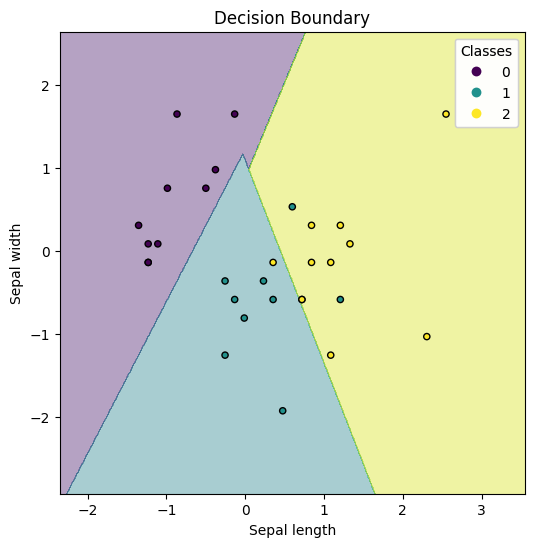

For the training data:
Confusion Matrix (Training set):
 [[39  1  0]
 [ 0 30 11]
 [ 0 15 24]]
Classification Report (Training set):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.65      0.73      0.69        41
           2       0.69      0.62      0.65        39

    accuracy                           0.78       120
   macro avg       0.78      0.77      0.78       120
weighted avg       0.78      0.78      0.78       120

Accuracy (Training set): 0.775


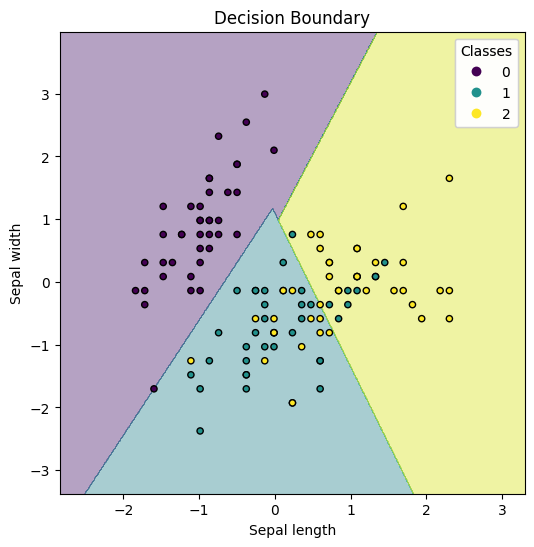

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Load dataset from sklearn - load iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
print(iris_df.head())
X = iris.data[:, :2] # Use only the first two features
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Preprocess the feature matrix using standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Create SVM classifier
svm = SVC(kernel='linear', random_state=42)
# Train the SVM model
svm.fit(X_train, y_train)
# Predict the test set results
y_pred = svm.predict(X_test)
# Predict the training set results (newly added)
y_train_pred = svm.predict(X_train)
# Confusion matrices
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_train_pred)
# Function to plot decision boundary
def plot_decision_boundary(X, y, model, ax):
 x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
 np.arange(y_min, y_max, 0.01))
 z = model.predict(np.c_[xx.ravel(), yy.ravel()])
 z = z.reshape(xx.shape)
 # Plot the decision boundary and the scatter plot of the data points
 ax.contourf(xx, yy, z, alpha=0.4)
 scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
 ax.set_xlabel('Sepal length')
 ax.set_ylabel('Sepal width')
 ax.set_title('Decision Boundary')
 # Add legend
 legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
 ax.add_artist(legend1)
# Plot the decision boundary for the test set
print("\nFor the test data:")
print("Confusion Matrix (Test set):\n", cm_test)
print("Classification Report (Test set):\n", classification_report(y_test, y_pred))
print("Accuracy (Test set):", accuracy_score(y_test, y_pred))
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_decision_boundary(X_test, y_test, svm, ax)
plt.show()
# Plot the decision boundary for the training set
print("For the training data:")
print("Confusion Matrix (Training set):\n", cm_train)
print("Classification Report (Training set):\n", classification_report(y_train, y_train_pred))
print("Accuracy (Training set):", accuracy_score(y_train, y_train_pred))
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_decision_boundary(X_train, y_train, svm, ax)
plt.show()

Experiment 4 Logistic Regression

Testing Evaluation Result for Logistic Regression

Accuracy:  0.32
Precision:"  0.30
Recall:  1.00
F1 Score:  0.46
ROC AUC Score:  0.76
[[ 1 26]
 [ 0 11]]


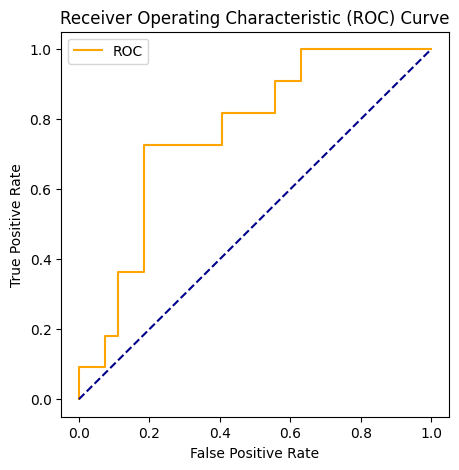

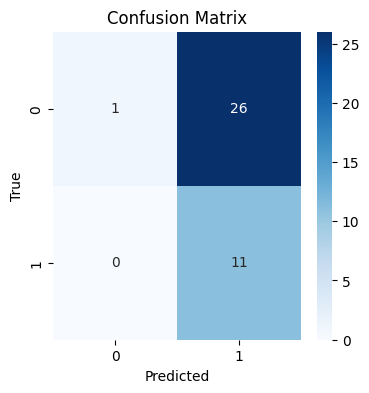

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import datasets

#load datasets from sklearn-load iris dataset
iris=datasets.load_iris()

X=iris.data[:, :2]
#X=iris.data
y=iris.target

#y=(y==0).astype(int)
y=np.where(y==1, 1, 0)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)
model=LogisticRegression()
model.fit(X_train, y_train)
import seaborn as sns
from sklearn import datasets

#load datasets from sklearn-load iris dataset
iris=datasets.load_iris()

X=iris.data[:, :2]
#X=iris.data
y=iris.target

#y=(y==0).astype(int)
y=np.where(y==1, 1, 0)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)
model=LogisticRegression()
model.fit(X_train, y_train)

#Preprocess the data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

y_pred=model.predict(X_test)
y_prob=model.predict_proba(X_test)[:, 1]
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_prob)
print("Testing Evaluation Result for Logistic Regression\n")
print(f'Accuracy: {accuracy: .2f}')
print(f'Precision:" {precision: .2f}')
print(f'Recall: {recall: .2f}')
print(f'F1 Score: {f1: .2f}')
print(f'ROC AUC Score: {roc_auc: .2f}')
cm_rf_Test=confusion_matrix(y_test, y_pred)
print(cm_rf_Test)

fpr, tpr, thresholds=roc_curve(y_test, y_prob)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(cm_rf_Test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Experiment 5 Develop a cost function of linear regression using sample dataset.

[16.9, 16.275573921028467, 15.662901744719928, 15.061983471074381, 14.47281910009183, 13.895408631772266, 13.329752066115702, 12.77584940312213, 12.23370064279155, 11.703305785123968, 11.184664830119377, 10.677777777777775, 10.182644628099172, 9.699265381083562, 9.227640036730945, 8.767768595041321, 8.319651056014692, 7.883287419651056, 7.4586776859504145, 7.045821854912765, 6.6447199265381105, 6.255371900826447, 5.877777777777777, 5.511937557392103, 5.157851239669421, 4.815518824609734, 4.484940312213039, 4.166115702479338, 3.859044995408632, 3.5637281910009184, 3.2801652892561974, 3.0083562901744716, 2.748301193755739, 2.5, 2.2634527089072547, 2.0386593204775028, 1.8256198347107442, 1.624334251606978, 1.434802571166207, 1.2570247933884295, 1.0910009182736453, 0.9367309458218548, 0.794214876033058, 0.6634527089072545, 0.544444444444444, 0.43719008264462766, 0.341689623507805, 0.25794306703397596, 0.1859504132231404, 0.12571166207529844, 0.07722681359044997, 0.04049586776859508, 0.0155

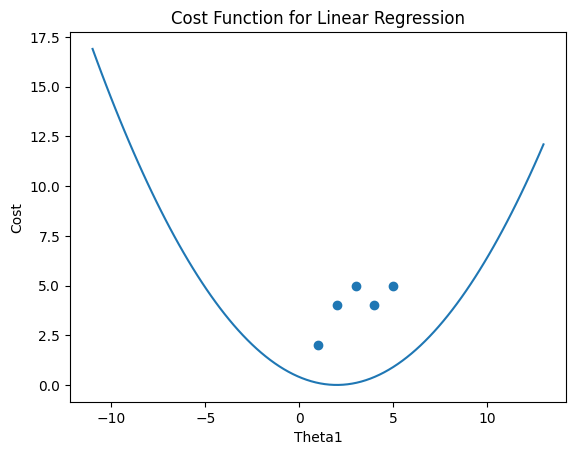

Initial Cost (MSE) with theta0= 0.0 and theta1= 13.0: 12.1
Final Cost (MSE) with theta0_exp= 0.2 and theta1_exp= 0.93: 0.07568999999999998


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])
plt.scatter(X, y)
m = len(y)
theta0 = 0.0 # y-intercept
theta1 = 0.0 #slope
def hypothesis(X, theta0, theta1):
 return theta0 + theta1 * X #y=mx+c
def cost_function(X, y, theta0, theta1):
 total_cost = 0
 for i in range(m):
  total_cost += (hypothesis(X[i], theta0, theta1) - y[i]) ** 2 # This line and the one below were indented to fix the IndentationError
  return total_cost / (2 * m) #MSE
theta1_values = np.linspace(-11, 13, 100)
cost_values = []
for theta1 in theta1_values:
 cost = cost_function(X, y, theta0, theta1)
 cost_values.append(cost)
print(cost_values)
plt.plot(theta1_values, cost_values, label='Cost Function')
plt.xlabel('Theta1')
plt.ylabel('Cost')
plt.title('Cost Function for Linear Regression')
plt.show()
initial_cost = cost_function(X, y, theta0, theta1)
print(f"Initial Cost (MSE) with theta0= {theta0} and theta1= {theta1}: {initial_cost}")
theta0_exp = 0.2
theta1_exp = 0.93
final_cost = cost_function(X, y, theta0_exp, theta1_exp)
# The following line was changed to fix the syntax error
print(f"Final Cost (MSE) with theta0_exp= {theta0_exp} and theta1_exp= {theta1_exp}: {final_cost}")

Practical 8: Perform hyper parameter tuning using sample dataset.

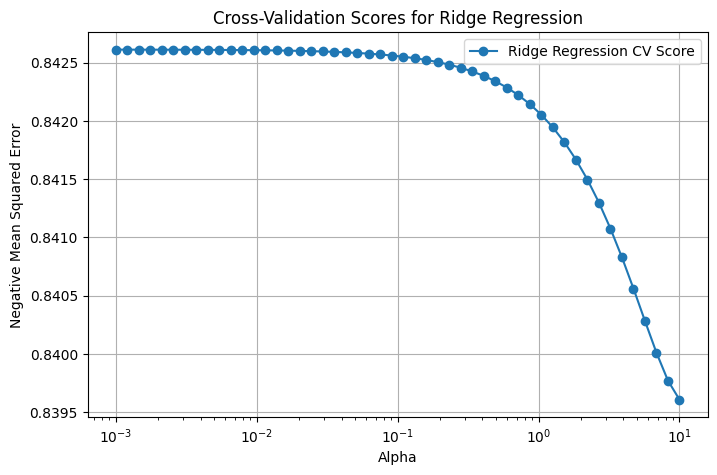

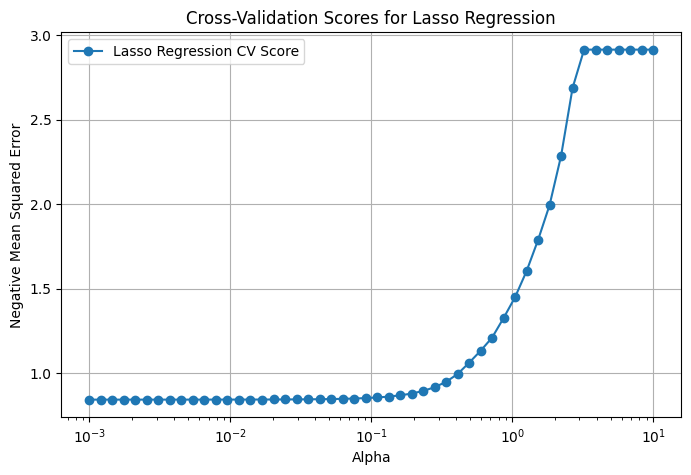

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X_multi = 2.5 * np.random.randn(100, 3) + 1.5
y_multi = 2 + 0.3 * X_multi[:, 0] + 0.5 * X_multi[:, 1] - 0.2 * X_multi[:, 2] + np.random.randn(100)

# Corrected: Providing test_size to train_test_split
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.2)

alpha = np.logspace(-3, 1, 50)
ridge_cv_scores = []
lasso_cv_scores = []

for a in alpha:
    ridge_model = Ridge(alpha=a)
    ridge_cv_score = cross_val_score(ridge_model, X_multi_train, y_multi_train, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_scores.append(np.mean(ridge_cv_score))

    lasso_model = Lasso(alpha=a)
    lasso_cv_score = cross_val_score(lasso_model, X_multi_train, y_multi_train, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_scores.append(np.mean(lasso_cv_score))

ridge_cv_scores = np.array(ridge_cv_scores)
lasso_cv_scores = np.array(lasso_cv_scores)  # Corrected: Using lasso_cv_scores instead of ridge_cv_scores

plt.figure(figsize=(8, 5))
plt.plot(alpha, -ridge_cv_scores, marker='o', label='Ridge Regression CV Score')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title('Cross-Validation Scores for Ridge Regression')  # Corrected: Title consistency
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(alpha, -lasso_cv_scores, marker='o', label='Lasso Regression CV Score')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title('Cross-Validation Scores for Lasso Regression')  # Corrected: Title consistency
plt.legend()
plt.grid(True)
plt.show()

Practical 9: Using sample data implement the evaluation parameters of regression techniques.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(0)
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

data=pd.DataFrame(np.hstack((X,y)),columns=['X','y'])
print(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse : .2f}")
print(f"Mean Absolute Error: {mae: .2f}")
print(f"Root Mean Squared Error: {rmse: .2f}")
print(f"R-squared: {r2: .2f}")

           X         y
0   1.097627  6.127731
1   1.430379  9.191963
2   1.205527  8.082243
3   1.089766  5.733055
4   0.847310  8.030181
..       ...       ...
95  0.366383  5.780743
96  1.173026  6.715668
97  0.040215  3.431095
98  1.657880  8.518108
99  0.009391  4.045652

[100 rows x 2 columns]
Mean Squared Error:  0.92
Mean Absolute Error:  0.80
Root Mean Squared Error:  0.96
R-squared:  0.65


Practical 10 Implement k-means clustering using a dataset
(2d)

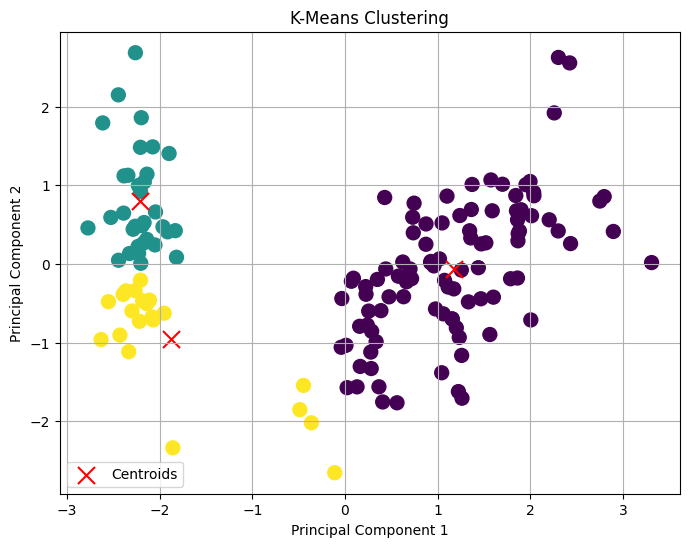

Cluster labels: 
[1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Centroids: 
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris=datasets.load_iris()
X=iris.data
y=iris.target

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
cluster=kmeans.labels_
centroids=kmeans.cluster_centers_

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', s=100)
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], marker='x', s=150, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

print(f"Cluster labels: \n{cluster}")
print(f"Centroids: \n{centroids}")


3d graph

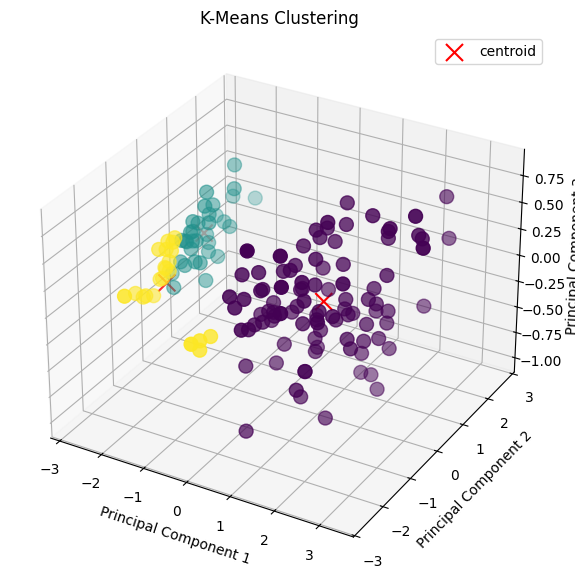

Cluster labels: [1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Centroids: [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

fig=plt.figure(figsize=(8, 7))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[: , 2] , c=kmeans.labels_, cmap='viridis', marker='o', s=100)
ax.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], pca.transform(centroids)[:, 2],c='red', marker='x', s=150, label='centroid')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

print(f"Cluster labels: {clusters}")
print(f"Centroids: {centroids}")

Practical 11: Explore the association rule mining techniques using sample data. (Apriori Implementation)


In [ ]:
#step1 install necessary pakage
!pip install mlxtend pandas

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

data={
    "Milk":[1, 1, 0, 1, 0],
    "Bread":[1, 0, 1, 1, 0],
    "Eggs":[0, 1, 1, 0, 1],
    "Butter":[1, 0, 0, 1, 0]
}

df=pd.DataFrame(data)
df=df.astype(bool)
print("Transaction Dataset (Converted to Boolean)")
print(df)

frequent_itemset=apriori(df, min_support=0.4, use_colnames=True)
print("\nFrequent Itemset")
print(frequent_itemset)

rules=association_rules(frequent_itemset, metric='confidence', min_threshold=0.5)
print("Association Rules: ")
print(rules[['antecedents','consequents','support','confidence','lift']])

Transaction Dataset (Converted to Boolean)
    Milk  Bread   Eggs  Butter
0   True   True  False    True
1   True  False   True   False
2  False   True   True   False
3   True   True  False    True
4  False  False   True   False

Frequent Itemset
   support               itemsets
0      0.6                 (Milk)
1      0.6                (Bread)
2      0.6                 (Eggs)
3      0.4               (Butter)
4      0.4          (Bread, Milk)
5      0.4         (Butter, Milk)
6      0.4        (Bread, Butter)
7      0.4  (Bread, Butter, Milk)
Association Rules: 
        antecedents      consequents  support  confidence      lift
0           (Bread)           (Milk)      0.4    0.666667  1.111111
1            (Milk)          (Bread)      0.4    0.666667  1.111111
2          (Butter)           (Milk)      0.4    1.000000  1.666667
3            (Milk)         (Butter)      0.4    0.666667  1.666667
4           (Bread)         (Butter)      0.4    0.666667  1.666667
5          (Butter)

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

data={
    "HotDog":[],
    "Buns":[],
    "Ketchup":[],
    "Coke":[],
    "Chips":[]
}

df=pd.DataFrame(data)
df=df.astype(bool)
print("Transaction Dataset (Converted to Boolean)")
print(df)

frequent_itemset=apriori(df, min_support=0.33, use_colnames=True)
print("\nFrequent Itemset")
print(frequent_itemset)

rules=association_rules(frequent_itemset, metric='confidence', min_threshold=0.4)
print("Association Rules: ")
print(rules[['antecedents','consequents','support','confidence','lift']])

Practical 12:  Implement ANN using sample data.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

#normalize data
X_train = X_train/255.0
X_test = X_test/255.0

#reshape to 28*28*1
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

#create model
model = models.Sequential()

#flatten i/p before passing to dense layer
model.add(layers.Flatten(input_shape=(28,28,1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8817 - loss: 0.4220 - val_accuracy: 0.9564 - val_loss: 0.1403
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9636 - loss: 0.1199 - val_accuracy: 0.9674 - val_loss: 0.1008
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9776 - loss: 0.0768 - val_accuracy: 0.9721 - val_loss: 0.0871
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9823 - loss: 0.0582 - val_accuracy: 0.9738 - val_loss: 0.0829
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9872 - loss: 0.0423 - val_accuracy: 0.9762 - val_loss: 0.0782
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9897 - loss: 0.0334 - val_accuracy: 0.9743 - val_loss: 0.0822
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9929 - loss: 0.0255 - val_accuracy: 0.9762 - val_loss: 0.0765
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9946 - loss: 0

Practical 13 :Exploring activation function in ANN.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize data
x_train = x_train/255.0
x_test = x_test/255.0

#Reshape to 28X28X1
x_train=x_train.reshape(-1,28 * 28)
x_test=x_test.reshape(-1,28 * 28)

#function to create a model with different activation functions
def create_model(activation_function):
  model = models.Sequential()
  model.add(layers.Dense(128, activation=activation_function, input_shape=(28 * 28,)))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

activation_function=['relu', 'sigmoid', 'softmax', 'tanh']
result={}

for i in activation_function:
  print(f"Training model with {i} activation function")
  model=create_model(i)
  model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
  test_loss, test_acc=model.evaluate(x_test, y_test)
  result[i]=test_acc
  print(f"Test Accuracy: {test_acc}")
  print(f"Test Loss: {test_loss}")

print("\n Result:")
for i, j in result.items():
  print(f"Actication = {i}: with test accuracy = {j}")



Training model with relu activation function


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8775 - loss: 0.4385 - val_accuracy: 0.9595 - val_loss: 0.1332
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9630 - loss: 0.1247 - val_accuracy: 0.9687 - val_loss: 0.0991
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9768 - loss: 0.0792 - val_accuracy: 0.9734 - val_loss: 0.0851
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9830 - loss: 0.0566 - val_accuracy: 0.9757 - val_loss: 0.0755
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9871 - loss: 0.0432 - val_accuracy: 0.9781 - val_loss: 0.0714
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.0821
Test Accuracy: 0.9781000018119812
Test Loss: 0.0714312493801117
Training model with sigmoid activation function
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8392 - loss: 0.6475 - val_accuracy: 0.9329 - val_loss: 0.2272
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━

Practical 14: Implementation of Transformer Neural Network model.